In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [2]:
california = fetch_california_housing()

In [3]:
data = pd.DataFrame(california.data, columns=california.feature_names)
data["PRICE"] = california.target

In [4]:
data["Rooms_Income_Interaction"] = data["AveRooms"] * data["MedInc"]

In [5]:
data["Log_MedInc"] = np.log(data["MedInc"])

In [6]:
X = data[["Log_MedInc", "AveRooms", "AveOccup", "Rooms_Income_Interaction"]]
y = data["PRICE"]

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [9]:
poly_features = poly.get_feature_names_out(
    ["Log_MedInc", "AveRooms", "AveOccup", "Rooms_Income_Interaction"]
)
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_df, y, test_size=0.2, random_state=42
)

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [12]:
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {linear_mse}")
print(f"Linear Regression R^2 Score: {linear_r2}")

Linear Regression Mean Squared Error: 1.1056316289134287
Linear Regression R^2 Score: 0.15626980028965087


In [13]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression R^2 Score: {ridge_r2}")

Ridge Regression Mean Squared Error: 1.103689108329127
Ridge Regression R^2 Score: 0.1577521776363855


In [14]:
ridge_cv_scores = cross_val_score(ridge_model, X_poly_df, y, cv=5, scoring="r2")
print(f"Ridge 5-Fold Cross-Validation R^2 Scores: {ridge_cv_scores}")
print(f"Average 5-Fold CV R^2 Score: {np.mean(ridge_cv_scores)}")

Ridge 5-Fold Cross-Validation R^2 Scores: [-1.30357438  0.43858625  0.48672912  0.32440951 -3.44320322]
Average 5-Fold CV R^2 Score: -0.6994105436011708


In [15]:
param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring="r2")
grid_search.fit(X_poly_df, y)
print(f"Best Ridge Parameters: {grid_search.best_params_}")
print(f"Best Ridge Cross-Validation R^2 Score: {grid_search.best_score_}")

Best Ridge Parameters: {'alpha': 100.0}
Best Ridge Cross-Validation R^2 Score: -0.6345234814978732


In [16]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")
print(f"Lasso Regression R^2 Score: {lasso_r2}")

Lasso Regression Mean Squared Error: 0.8123490236660273
Lasso Regression R^2 Score: 0.3800797787904894


In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R^2 Score: {rf_r2}")

Random Forest Mean Squared Error: 0.5399865628806875
Random Forest R^2 Score: 0.5879251654658468


In [19]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [21]:
print("Feature ranking:")
for f in range(X_poly_df.shape[1]):
    print(f"{f + 1}. feature {poly_features[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature Log_MedInc^2 (0.29032186457001663)
2. feature Log_MedInc (0.26719243737906195)
3. feature AveRooms AveOccup (0.07833301987736899)
4. feature AveOccup^2 (0.07180514116723503)
5. feature AveOccup (0.06678713145697164)
6. feature Log_MedInc AveOccup (0.04383782484406103)
7. feature AveOccup Rooms_Income_Interaction (0.03164947175462018)
8. feature Log_MedInc Rooms_Income_Interaction (0.02934177965840809)
9. feature AveRooms (0.026933514075442262)
10. feature AveRooms^2 (0.02691944267397528)
11. feature AveRooms Rooms_Income_Interaction (0.02213907437632551)
12. feature Log_MedInc AveRooms (0.017651911298220416)
13. feature Rooms_Income_Interaction^2 (0.013746474322151613)
14. feature Rooms_Income_Interaction (0.013340912546141368)


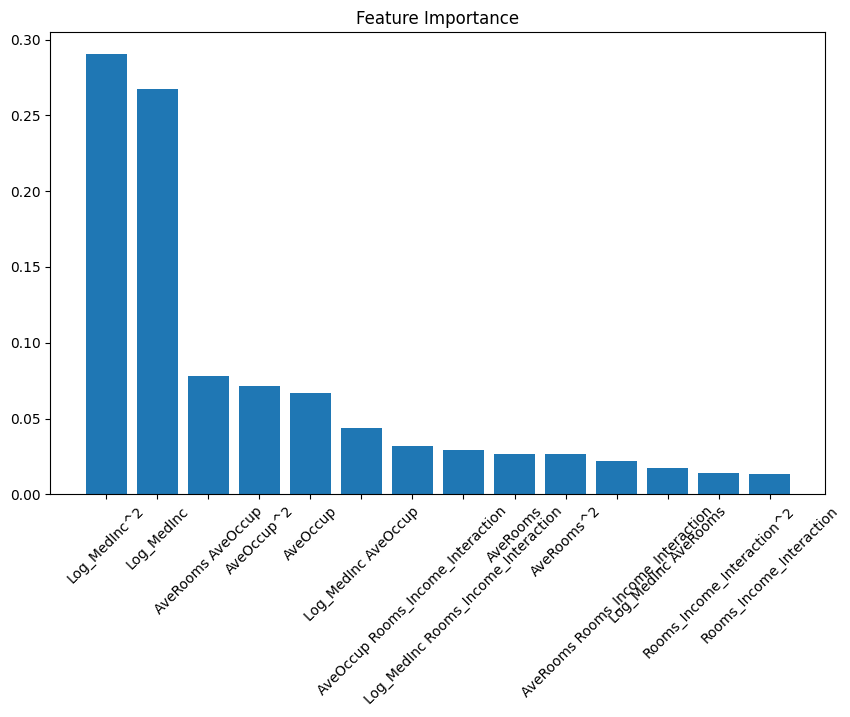

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_poly_df.shape[1]), importances[indices], align="center")
plt.xticks(range(X_poly_df.shape[1]), [poly_features[i] for i in indices], rotation=45)
plt.show()

In [24]:
# Comparison of the different models
models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"]
mse_scores = [linear_mse, ridge_mse, lasso_mse, rf_mse]
r2_scores = [linear_r2, ridge_r2, lasso_r2, rf_r2]

Text(0, 0.5, 'Mean Squared Error')

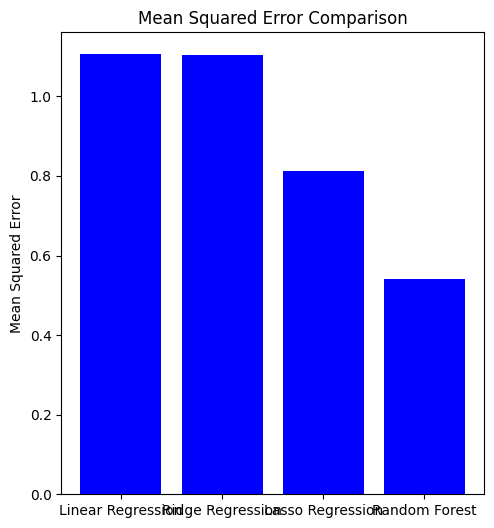

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color="blue")
plt.title("Mean Squared Error Comparison")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'R^2 Score')

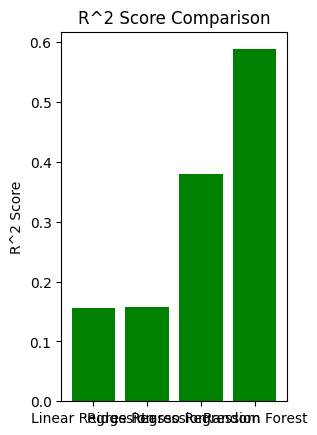

In [26]:
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color="green")
plt.title("R^2 Score Comparison")
plt.ylabel("R^2 Score")

In [27]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>